In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('../DATA/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Attribute Information:

age: The patient's age in years.

sex: Sex of the patient (1 = male, 0 = female).

cp: Chest pain type (4 values):
•	0: Typical angina
•	1: Atypical angina
•	2: Non-anginal pain
•	3: Asymptomatic

trestbps: Resting blood pressure in mm Hg on admission to the hospital.

chol: Serum cholesterol in mg/dl.

fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).

restecg: Resting electrocardiographic results (3 values):
•	0: Normal
•	1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
•	2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: Maximum heart rate achieved.

exang: Exercise-induced angina (1 = yes; 0 = no).

oldpeak: ST depression induced by exercise relative to rest.

slope: The slope of the peak exercise ST segment (3 values):
•	0: Upsloping
•	1: Flat
•	2: Downsloping

ca: Number of major vessels (0-3) colored by fluoroscopy.

thal: Thalassemia (3 values):
•	0: Normal
•	1: Fixed defect
•	2: Reversible defect

target: Diagnosis of heart disease (1 = presence of heart disease, 0 = absence of heart disease)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There is no missing value and all the columns have the correct data type

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


The participant age range from 29 to 77 with an average age of around 54. The mean of 0.15 for fasting blood sugar shows that that only a small proportion of the participants have a fasting blood sugar greater than 120mg/dl. From the summary statistics result, the maximum heart rate achieved(thalach) shows there might be significant variation in the performance of the participant. 

<Axes: xlabel='target', ylabel='count'>

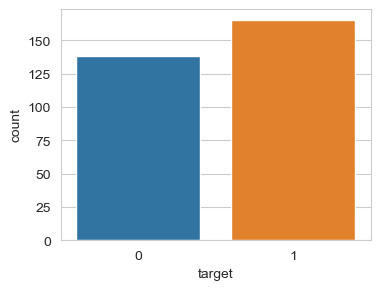

In [5]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='target')

The countplot for the target label shows that the number of participant that has heart condition is slightly above the no of particiapnt without heart condition. This also suggests that we are not going to encounter the issue of imbalanced data.

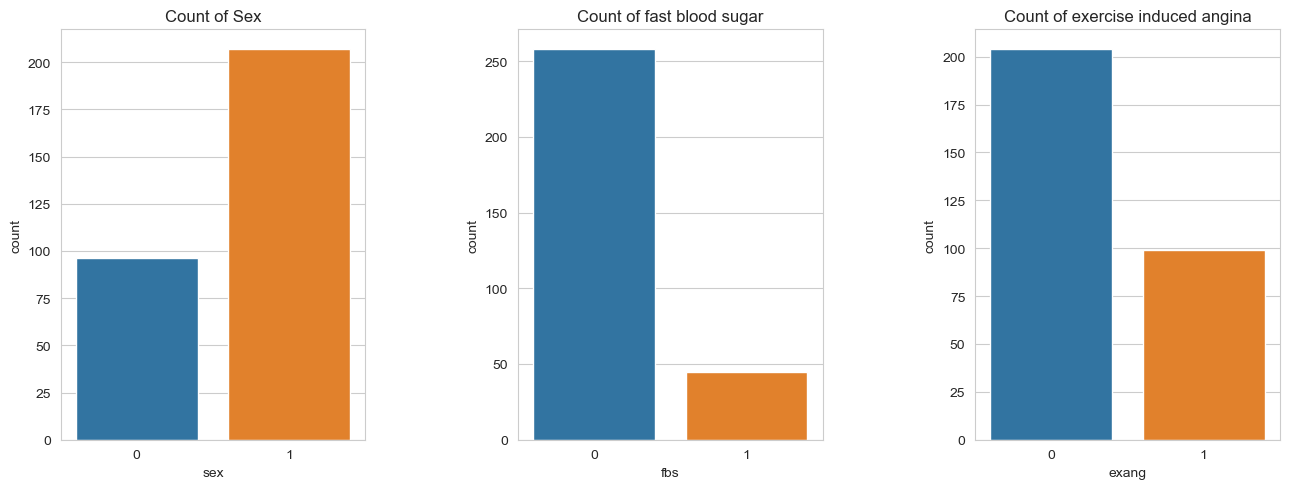

In [6]:
fig,ax=plt.subplots(1,3,figsize=(13,5))
sns.countplot(data=df,x='sex',ax=ax[0])
ax[0].set_title('Count of Sex')
sns.countplot(data=df,x='fbs',ax=ax[1])
ax[1].set_title('Count of fast blood sugar')
sns.countplot(data=df,x='exang',ax=ax[2])
ax[2].set_title('Count of exercise induced angina')
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

From the visulization, it shows that greater number of participant were male. The proportion of participants with an exercise induced angina is low 

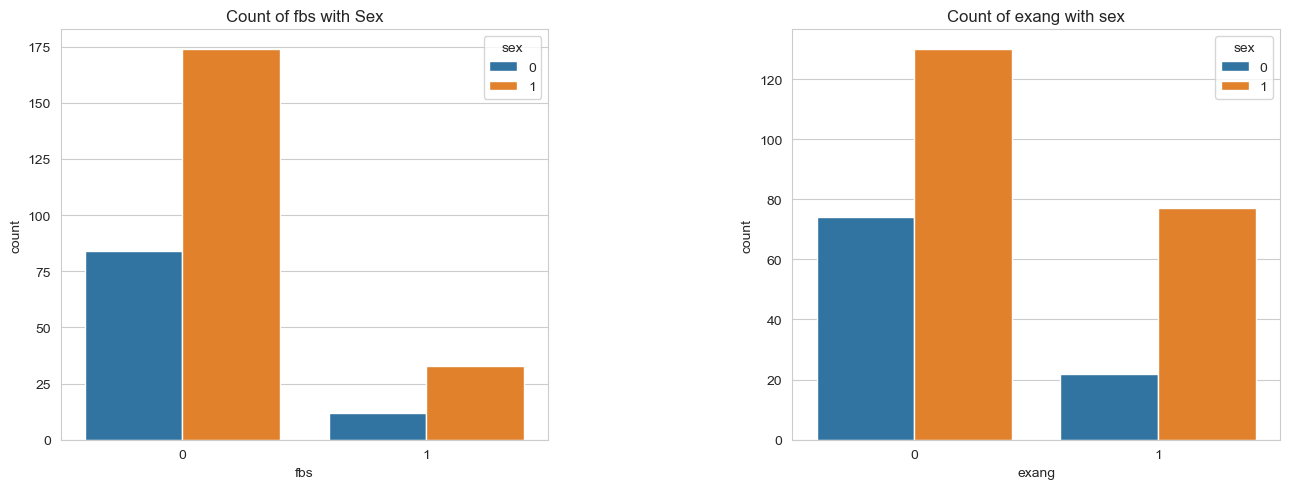

In [7]:
fig,ax=plt.subplots(1,2,figsize=(13,5))
sns.countplot(data=df,x='fbs',hue='sex',ax=ax[0])
ax[0].set_title('Count of fbs with Sex')
sns.countplot(data=df,x='exang',hue='sex',ax=ax[1])
ax[1].set_title('Count of exang with sex')
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

Males showed the high tendency of having exercise induced angina when compared with females. The proportion of males with fast blood sugar greater than 120 is high compared with female.

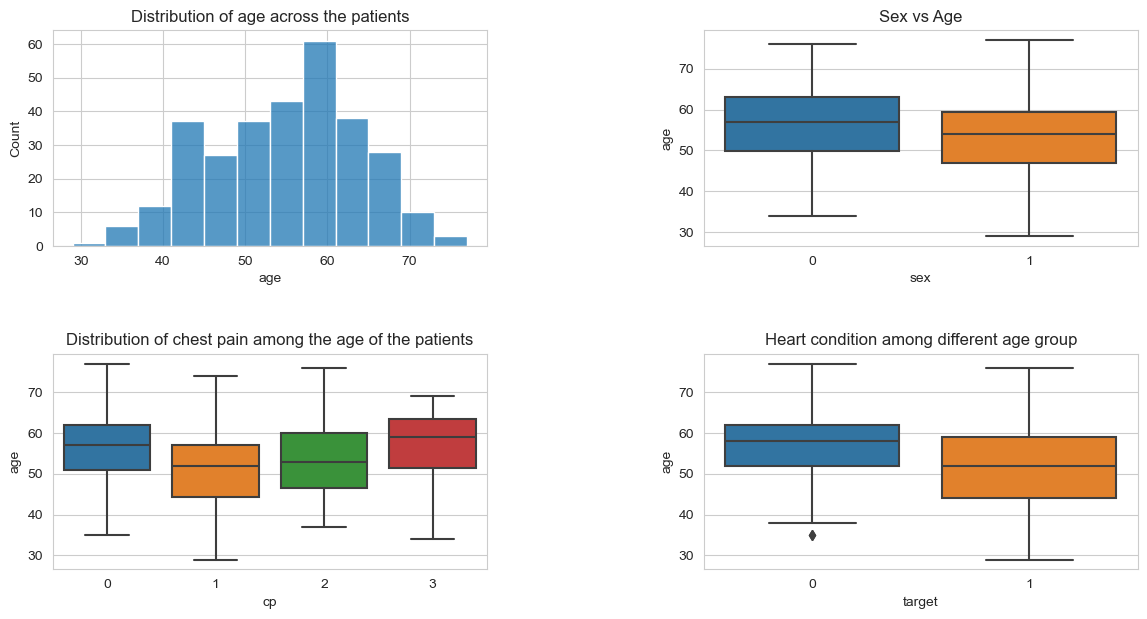

In [8]:
fig,ax = plt.subplots(2,2,figsize=(14,7))
sns.histplot(data=df,x='age',ax=ax[0][0])
ax[0][0].set_title('Distribution of age across the patients')
sns.boxplot(data=df,x='sex',y='age',ax=ax[0][1])
ax[0][1].set_title('Sex vs Age')
sns.boxplot(data=df,x='cp',y='age',ax=ax[1][0])
ax[1][0].set_title('Distribution of chest pain among the age of the patients')
sns.boxplot(data=df,x='target',y='age',ax=ax[1][1])
ax[1][1].set_title('Heart condition among different age group')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

The distribution of the age showed that the research was conducted on middle-age individual with the ages ranging from 29-77. Analyzing the age of the sex involved in the analysis showed that older females are more compared to males with a median age of 55. Patients with typical angina(0) tend to be older with a median age close to 60. This suggests that typical angina is more common among older adults. Patients with atypical angina(1) have a median age around 50 indicating that this type of chest pain can occur in relatively younger patients compared to typical angina. Asymptomatic patients have a median age slightly above 55, indicating that a significant number of older adults might not exhibit sumptoms of chestpain despite having underlying condition.

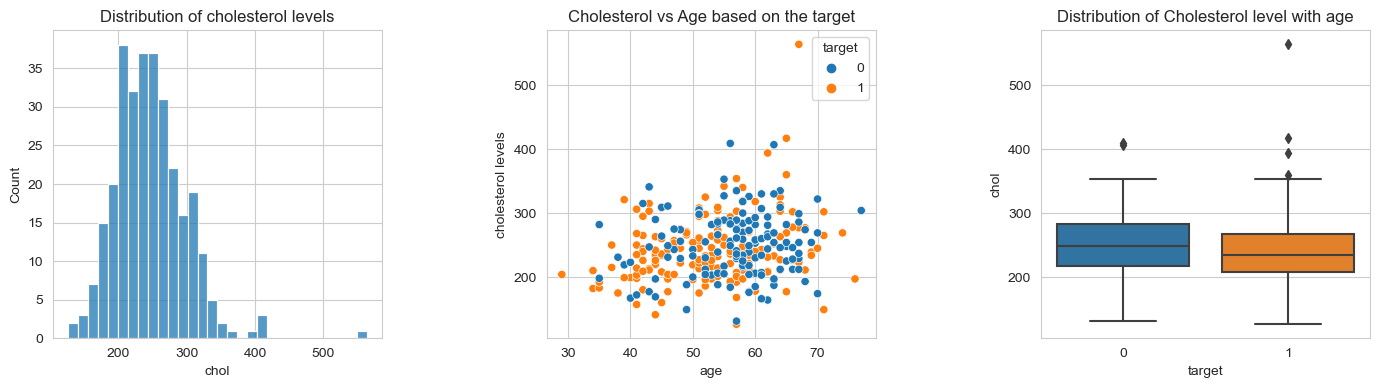

In [9]:
fig,ax= plt.subplots(1,3,figsize=(17,4))
sns.histplot(df['chol'],bins=30,ax=ax[0])
ax[0].set_title('Distribution of cholesterol levels')

sns.scatterplot(data=df,x='age',y='chol',hue='target',ax=ax[1])
ax[1].set_title('Cholesterol vs Age based on the target')
ax[1].set_xlabel('age')
ax[1].set_ylabel('cholesterol levels')

sns.boxplot(data=df,x='target',y='chol',ax=ax[2])
ax[2].set_title('Distribution of Cholesterol level with age')
plt.subplots_adjust(wspace=0.5)

The distribution of the cholesterols levels appears to be slightly right-skewed with a few high outliers. Most cholesterol levels fall between 200 and 300, with a peak around 240-260

There is no clear relationship between age and cholesterol level. There is an overlap between age and cholesterol level in relation to patients with and without heart condition. This suggests that age and cholesterol level alone cannot be used a metric for heart condition.

There is somewhat of a similar cholesterol level between the two groups. This might suggest that high cholesterol is common in patients with and without heart disease. We can say that although high cholesterol is a risk factor for heart disease, its presence in high levels in both patients with and without heart disease suggests that it alone may not differentiate between the two groups. We can say that high cholesterol alone might not contribute to heart disease.

<Axes: >

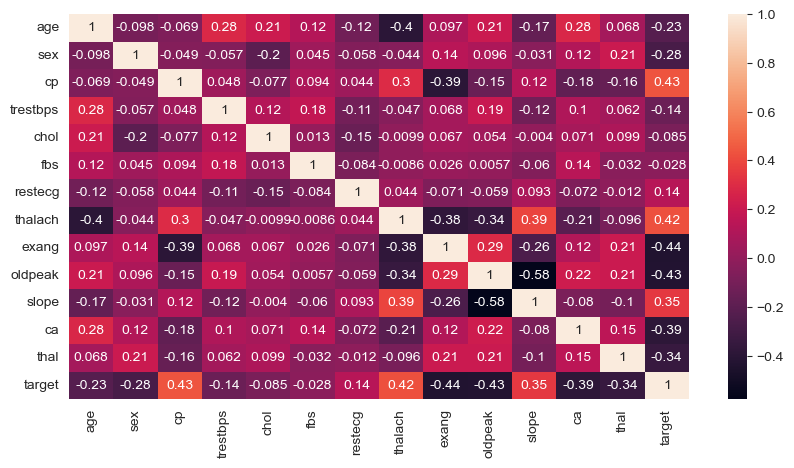

In [10]:
#heatmap showing the correlation of the features
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

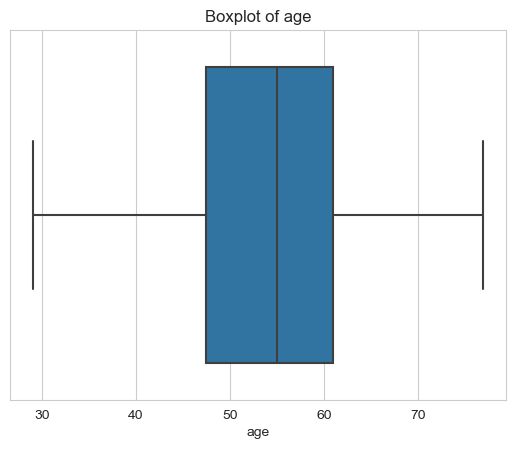

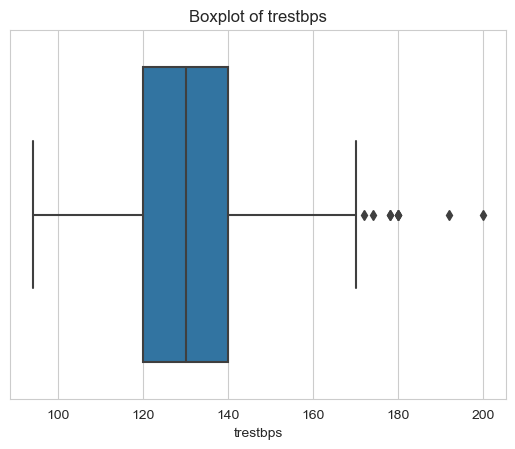

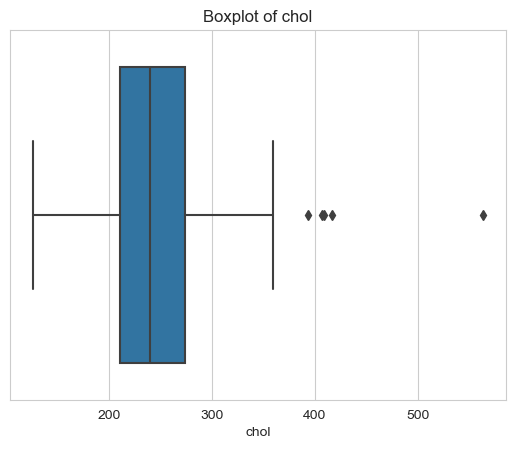

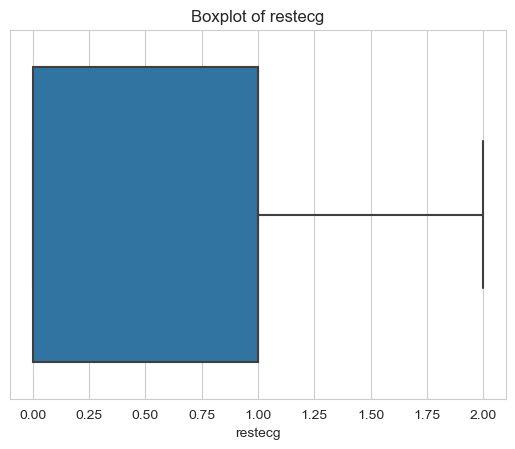

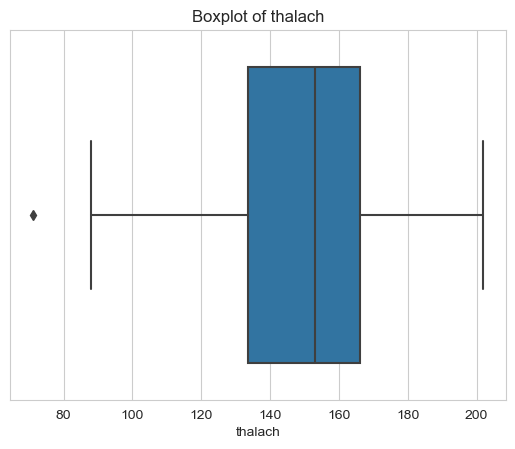

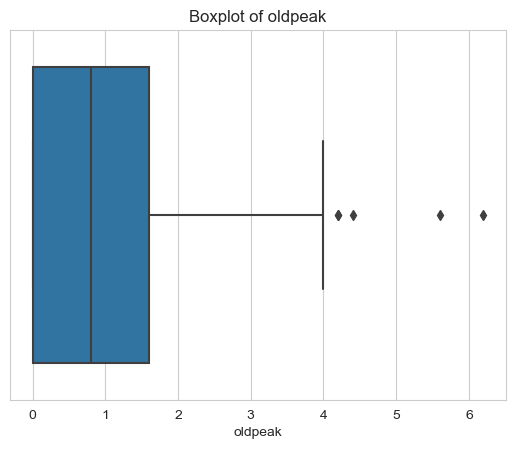

In [12]:
#Dealing with the outliers
cols= ['age', 'trestbps', 'chol','restecg', 'thalach', 'oldpeak']

for col in cols:
    sns.boxplot(data=df,x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [13]:
Q1 = df['trestbps'].quantile(q=0.25)
Q3 = df['trestbps'].quantile(q=0.75)
lower_limit = Q1-1.5*(Q3-Q1)
upper_limit = Q3+1.5*(Q3-Q1)
print('lower limit in trestbps:', lower_limit)
print('lower limit in trestbps:', upper_limit)
print('Number of upper_outlier in trestbps:',df[df['trestbps']>170]['trestbps'].count())
print('Number of lower_outlier in trestbps:',df[df['trestbps']<90]['trestbps'].count())

print('\n')

Q1 = df['chol'].quantile(q=0.25)
Q3 = df['chol'].quantile(q=0.75)
chol_lower_limit = Q1-1.5*(Q3-Q1)
chol_upper_limit = Q3+1.5*(Q3-Q1)
print('lower limit in chol:', chol_lower_limit)
print('lower limit in chol:', chol_upper_limit)
print('Number of upper_outlier in chol:',df[df['chol']>369.75]['chol'].count())
print('Number of lower_outlier in chol:',df[df['chol']<115.75]['chol'].count())
print('\n')

Q1 = df['thalach'].quantile(q=0.25)
Q3 = df['thalach'].quantile(q=0.75)
thalach_lower_limit = Q1-1.5*(Q3-Q1)
thalach_upper_limit = Q3+1.5*(Q3-Q1)
print('lower limit in thalach:', thalach_lower_limit)
print('lower limit in thalach:', thalach_upper_limit)
print('Number of upper_outlier in thalach:',df[df['thalach']>214.75]['thalach'].count())
print('Number of lower_outlier in thalach:',df[df['thalach']<84.75]['thalach'].count())

lower limit in trestbps: 90.0
lower limit in trestbps: 170.0
Number of upper_outlier in trestbps: 9
Number of lower_outlier in trestbps: 0


lower limit in chol: 115.75
lower limit in chol: 369.75
Number of upper_outlier in chol: 5
Number of lower_outlier in chol: 0


lower limit in thalach: 84.75
lower limit in thalach: 214.75
Number of upper_outlier in thalach: 0
Number of lower_outlier in thalach: 1


In [14]:
#Replacing outlier with median
df.loc[(df['trestbps'] < lower_limit) | (df['trestbps'] > upper_limit), 'trestbps'] = df['trestbps'].median()
df.loc[(df['chol'] < chol_lower_limit) | (df['chol'] > chol_upper_limit), 'chol'] = df['chol'].median()
df.loc[(df['thalach'] < thalach_lower_limit) | (df['thalach'] > thalach_upper_limit), 'thalach'] = df['thalach'].median()

For this analysis, I used the median as a suitable measure for outlier replacement. The idea is that the median is less affected by the presence of outliers and provides a more accurate representation of the central tendency for skewed distributions, such as the cholesterol level.

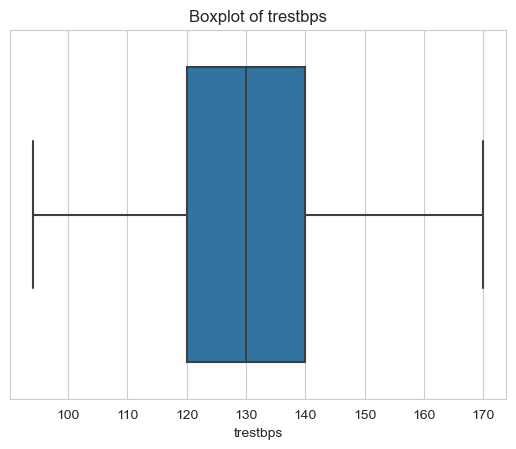

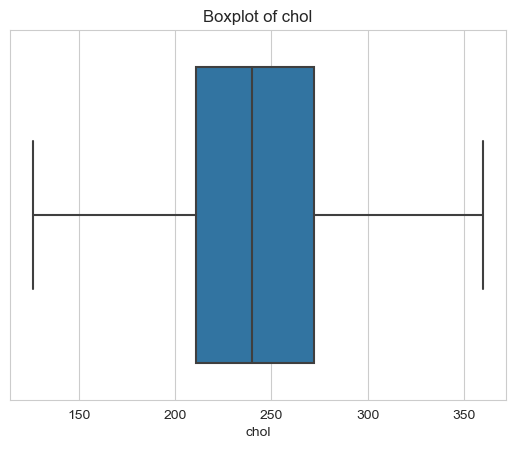

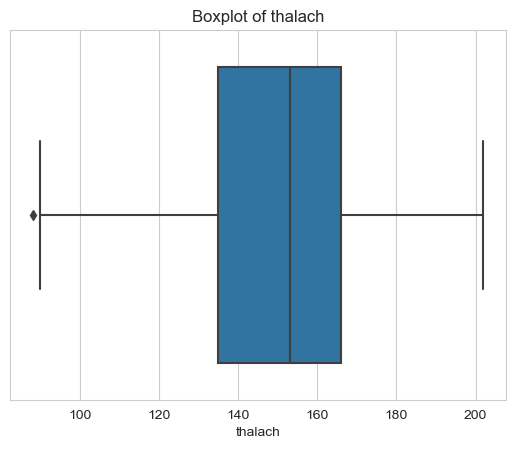

In [15]:
cols= ['trestbps', 'chol', 'thalach']

for col in cols:
    sns.boxplot(data=df,x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Machine Learning

In [16]:
#Seperating the features from the target label into X and y
X = df.drop('target',axis=1)
y = df['target']

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [18]:
#perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
#scale your data. Fit only the training features and transform the test features. This is to prevent data leakage
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='saga',max_iter=5000)

In [21]:
param_grid = {'penalty':['l1', 'l2'],'C':np.logspace(0,4,10)}
grid = GridSearchCV(estimator=logmodel,param_grid=param_grid)

In [22]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [23]:
grid.best_params_

{'C': 7.742636826811269, 'penalty': 'l2'}

In [24]:
y_pred = grid.predict(X_test)

In [25]:
coefficients = grid.best_estimator_.coef_
coefficients

array([[-0.12317202, -0.78889605,  0.94661689, -0.20774098, -0.38291488,
         0.05130452,  0.10391145,  0.38150344, -0.449517  , -0.5607297 ,
         0.43241632, -0.90360272, -0.59729885]])

In [26]:
coeff = pd.DataFrame(coefficients,columns=X.columns).transpose()

In [27]:
coeff.rename(columns={0:'coefficient'},inplace=True)
coeff=coeff.sort_values(by='coefficient',ascending=True)

<Axes: ylabel='coefficient'>

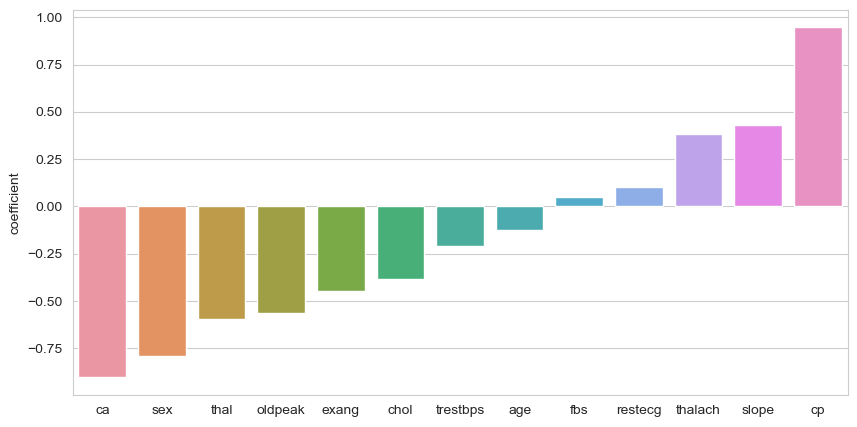

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(data=coeff,x=coeff.index,y='coefficient')

The interpretation of the coefficients shows that there is an increase in the likelihood that a patient will have a heart disease as you increase the chest pain features. It is safe to say that this particular feature might have had the strongest effect on prediction output. Similarily, there is a decrease if a patient will have a heart condition if you increase the sex and cholesterol features. This makes sense as the exploration of our data showed us that that is the case.

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,RocCurveDisplay,roc_curve,auc,precision_recall_curve,roc_auc_score

In [30]:
print(confusion_matrix(y_test,y_pred))

[[12  3]
 [ 2 14]]


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [32]:
cm = confusion_matrix(y_test, y_pred, labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=grid.classes_)

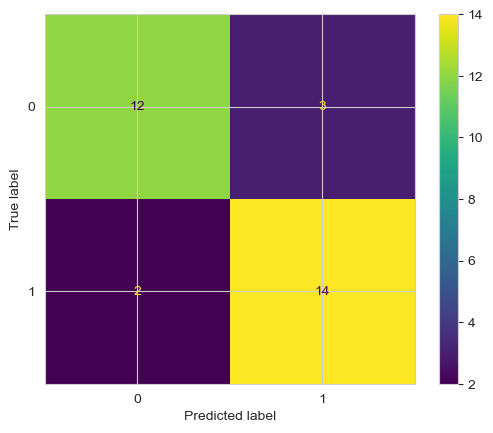

In [33]:
disp.plot()

In [34]:
y_prob=grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.95


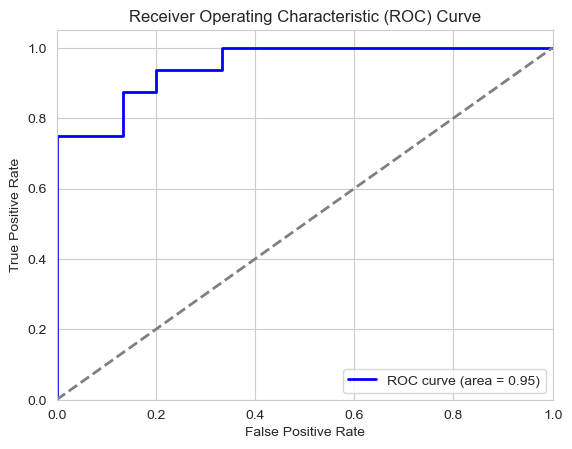

In [35]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Assuming we have a patient with the following data. How can our model predict that this patient might have the likelihood of having a heart condition or not.

In [36]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [37]:
patient

[[54.0, 1.0, 0.0, 122.0, 286.0, 0.0, 0.0, 116.0, 1.0, 3.2, 1.0, 2.0, 2.0]]

In [38]:
grid.predict(patient)

array([0], dtype=int64)

In [39]:
grid.predict_proba(patient)

array([[1.00000000e+00, 2.51624532e-45]])

My model predicted that this patient have 100% probaility of not having a heart condition